### GMM 을 이용한 붓꽃 데이터 셋 클러스터링
* GMM군집화

군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식

* 가우시안 분포

 ![nn](6.jpg)
 정규분포로도 알려진 가우시안 분포는 좌우 대칭형의 종 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수
 평균을 중심으로 높은데이터 분포도를 가지고 있음
 좌우 표준편차 1에 전체 데이터의 68.2%, 좌우 표준편차 2에 전체 데이터 95.45%를 가지고 있음
 평균 = 0, 표준편차 = 1
 
 * GMM(Gaussian Mixture Model)
 
 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주
 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출

먼저 다음과 같이 세 개의 가우시안 분포 A, B, C를 가진 데이터 세트가 있다고 가정
![nn](7.jpg)
세 개의 정규분포를 합치면 다음 형태가 됨
![nn](8.jpg)
군집화를 수행하려는 실제 데이터 세트의 데이터 분포도가 다음과 같다면 쉽게 이 데이터 세트가 정규분포 A, B, C가 합쳐서 된 데이터 분포도임을 알 수 있음
![nn](9.jpg)
전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있음
서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식

가령 1000개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규분포에 속하는지 결정하는 방식.
![nn](10.jpg)

이와 같은 방식은 GMM에서는 모수 추정이라 함
* 모수 추정이 추정하는 2가지

개별 정규분포의 평균과 분산
각 데이터가 어떤 정규 분포에 해당되는지의 확률

* EM(Expectation and Maximization)

GMM에서 모수추정을 위해 사용
사이킷런은 GMM의 EM방식을 통한 모수 추정 군집화를 지원하기 위해 GaussianMixture클래스를 지원

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#GMM은 확률 기반 군집화, K-평균은 거리 기반 군집화
#붓꽃 데이터 세트로 이 두가지 방식을 이용해 군집화를 수행한 뒤 양쪽 방식을 비교
iris = load_iris()#붓꽃 데이터 로드
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [2]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


### GMM과 K-평균의 비교

### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  

* clusterobj

사이킷런의 군집 수행 객체. KMeans나 GaussianMixture의 fit( )와 predict( )로 군집화를 완료한 객체
만약 군집화 결과 시각화가 아니고 make_ blobs( )로 생성한 데이터의 시각화일 경우 None 입력

* datatrame

피처 데이터 세트와 label 값을 가진 DataFrame
* label_ name

군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명
make_blobs( ) 결과 시각화일 경우는 dataframe 내의 target 칼럼명

* iscenter 

사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False


In [10]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

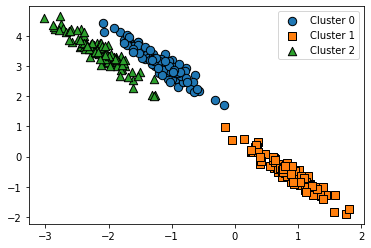

In [5]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

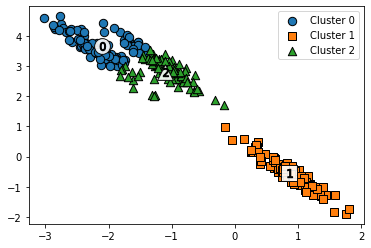

In [11]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

#KMeans는 대표적으로 데이터가 길쭉한 타원형으로 늘어선 경우에는 군집화를 잘 수행하지 못함
#KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음
#KMeans가 평균 거리 기반으로 군집화를 수행하므로 같은 거리 상 원형으로 군집을 구성하면서 아래와 같이 길쭉한 방향으로 데이터가 밀접해있을 경우에는 최적의 군집화가 어려움

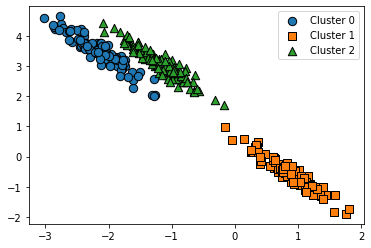

In [7]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

#데이터가 분포된 방향에 따라 정확하게 군집화됨.
#GMM은 KMeans와 다르게 군집의 중심좌표를 구할 수 없기 때문에 visualize_cluster_plot()에서 군집 중심표현이 시각화 되지 않음. 

In [8]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


KMeans의 경우 군집 1번만 정확히 매핑됨
나머지 군집의 경우 target값이 어긋나는 경우 발생

GMM의 경우 군집이 target값과 잘 매핑

GMM은 KMeans보다 유연하게 다양한 데이터에 잘 적용될 수 있다는 장점 /
군집화를 위한 수행시간이 오래 걸린다는 단점